In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from difflib import SequenceMatcher as sm
from utils.diff import diff
from utils.merge import merge

In [2]:
sea_lst = []
for y in range(1990, 2024):
    for s in ['03-31', '06-30', '09-30', '12-31']:
        sea_lst.append(f'{y}-{s}')
sea_df = pd.DataFrame(sea_lst[:-3], columns=['会计期间'])
sea_df['on'] = 0

stk_df1 = pd.read_csv('../../data/csmar/公司文件.csv')
stk_df1['on'] = 0
header1 = pd.merge(stk_df1, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

stk_df2 = pd.read_csv('../../data/tushare/股票列表.csv')
stk_df2['on'] = 0
header2 = pd.merge(stk_df2, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

stk_df3 = pd.read_csv('../../data/jqdata/所有股票数据.csv')
stk_df3['on'] = 0
header3 = pd.merge(stk_df3, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

header = pd.merge(pd.merge(header1, header2, on=['证券代码', '会计期间'], how='outer'), header3, on=['证券代码', '会计期间'], how='outer')
header

,证券代码,会计期间
0,1,1990-03-31
1,1,1990-06-30
2,1,1990-09-30
3,1,1990-12-31
4,1,1991-03-31
...,...,...
730431,688512,2022-03-31
730432,688512,2022-06-30
730433,688512,2022-09-30
730434,688512,2022-12-31


In [3]:
df1 = pd.read_csv('../../data/csmar/季_利润表.csv').rename(columns={'其中：对联营企业和合营企业的投资收益': '对联营企业及合营企业的投资收益', '其中：以摊余成本计量的金融资产终止确认收益': '以摊余成本计量的金融资产终止确认收益', '减：提取未到期责任准备金': '提取未到期责任准备金', '减：摊回保险责任准备金': '摊回保险责任准备金', '其中：受托客户资产管理业务净收入': '受托客户资产管理业务净收入', '其中：代理买卖证券业务净收入': '代理买卖证券业务净收入', '减：摊回分保费用': '摊回分保费用', '减：摊回赔付支出': '摊回赔付支出', '其中：分保费收入': '分保费收入', '其中:证券承销业务净收入': '证券承销业务净收入', '加：营业外收入': '营业外收入', '减：营业外支出': '营业外支出', '减：分出保费': '分出保费', '减：所得税费用': '所得税费用', '其中：非流动资产处置损失': '非流动资产处置净损失', '其中：非流动资产处置净损益': '非流动资产处置净损益', '其他综合收益(损失)': '其他综合收益', '税金及附加': '营业税金及附加', '其中：非流动资产处置利得': '非流动资产处置利得', '其中：利息费用(财务费用)': '利息费用(财务费用)', '其中：利息收入(财务费用)': '利息收入(财务费用)', '归属于母公司其他权益工具持有者的综合收益总额': '归属于母公司其他权益工具持有者的综合收益', '保险业务手续费及佣金支出': '保险业务支出', '归属少数股东的综合收益': '归属于少数股东的综合收益', '其他业务利润': '其他业务净收入', '提取保险责任准备金净额': '提取保险责任准备金', '提取保险责任准备金': '提取保险责任准备金1', '综合收益总额': '综合收益', '利润总额': '总利润'}).drop(columns=['报表类型', '是否发生差错更正', '差错更正披露日期', '证券简称', '非流动资产处置净损益', '赔付支出净额', '提取保险责任准备金1']).replace(0, np.nan)
df1 = diff(df1, col=list(set(df1.columns) - {'证券代码', '会计期间', '查询成功'})).replace(0, np.nan)
df2 = pd.read_csv('../../data/tushare/季_利润表.csv').rename(columns={'其中:对联营企业和合营企业的投资收益': '对联营企业及合营企业的投资收益', '减:摊回保险责任准备金': '摊回保险责任准备金', '减:手续费及佣金支出': '手续费及佣金支出', '归属于少数股东的综合收益总额': '归属于少数股东的综合收益', '减:摊回分保费用': '摊回分保费用', '减:摊回赔付支出': '摊回赔付支出', '其中:分保费收入': '分保费收入', '减:资产减值损失': '资产减值损失', '加:营业外收入': '营业外收入', '减:营业外支出': '营业外支出', '加:公允价值变动净收益': '公允价值变动收益', '赔付总支出': '赔付支出', '减:分出保费': '分出保费', '其中:减:非流动资产处置净损失': '非流动资产处置净损失', '减:管理费用': '管理费用', '减:销售费用': '销售费用', '减:营业成本': '营业成本', '减:财务费用': '财务费用', '保户红利支出': '保单红利支出', '减:利息支出': '利息支出', '加:投资净收益': '投资收益', '加:汇兑净收益': '汇兑收益', '减:营业税金及附加': '营业税金及附加', '归属于母公司(或股东)的综合收益总额': '归属于母公司所有者的综合收益', '财务费用:利息费用': '利息费用(财务费用)', '财务费用:利息收入': '利息收入(财务费用)', '净利润(含少数股东损益)': '净利润', '加:其他业务净收益': '其他业务净收入', '其他经营净收益': '其他经营净收入', '综合收益总额': '综合收益', '利润总额': '总利润'}).drop(columns=['TS股票代码', '公告日期', '实际公告日期', '报表类型', '公司类型', '报告期类型', '营业总成本(二)', '扣除非经常性损益后的净利润(更正前)', '持续经营净利润', '终止经营净利润']).replace(0, np.nan)
df3 = pd.read_csv('../../data/jqdata/季_利润数据.csv').rename(columns={'归属于母公司股东的净利润': '归属于母公司所有者的净利润', '归属于母公司所有者的综合收益总额': '归属于母公司所有者的综合收益', '归属于少数股东的综合收益总额': '归属于少数股东的综合收益', '对联营企业和合营企业的投资收益': '对联营企业及合营企业的投资收益', '提取保险合同准备金净额': '提取保险责任准备金', '综合收益总额': '综合收益', '利润总额': '总利润'}).drop(columns=['股票代码', '报告日期', '赔付支出净额']).replace(0, np.nan)

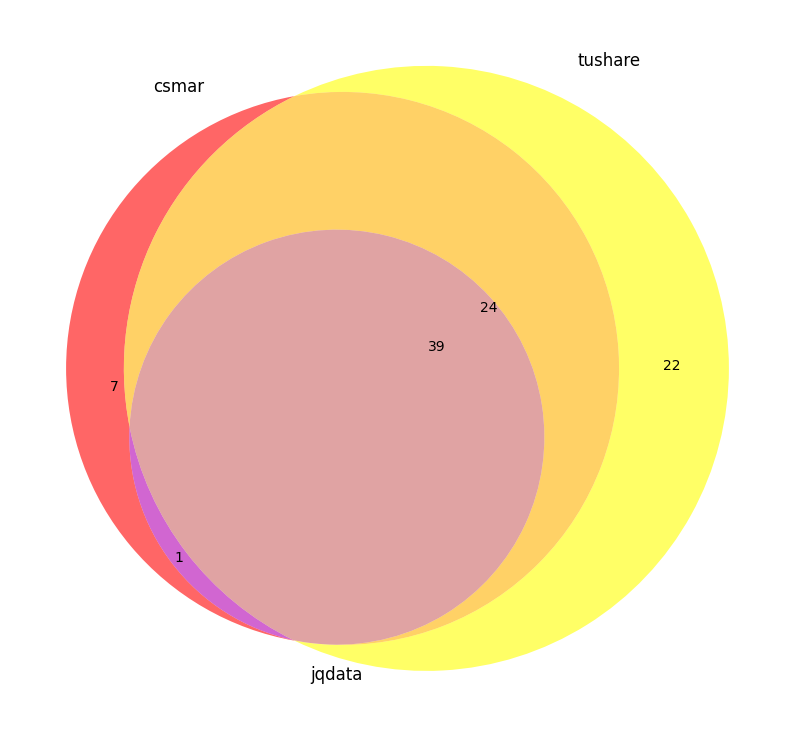

In [4]:
subsets = [set(df1.columns), set(df2.columns), set(df3.columns)]
plt.figure(figsize=(10, 10))
venn3(subsets, set_labels=('csmar', 'tushare', 'jqdata'), alpha=0.6, set_colors=("#FF0000", "#FFFF00", "#0000FF"))
plt.show()

In [5]:
df3 = pd.merge(header, df3, on=['证券代码', '会计期间'], how='left')
df4 = merge(df3, df1, df2, on=['证券代码', '会计期间'])
col = ['受托客户资产管理业务净收入', '以摊余成本计量的金融资产终止确认收益']
df4 = pd.merge(df4, df2[['证券代码', '会计期间'] + col], on=['证券代码', '会计期间'], how='left')
for c in col:
    df4[c] = df4[c + '_x'].fillna(df4[c + '_y'])
    df4.drop(columns=[c + '_x', c + '_y'], inplace=True)
col = sorted(list(set(df4.columns) - {'证券代码', '会计期间', '查询成功'}))
df4 = df4[['证券代码', '会计期间', '查询成功'] + col]
df4.to_csv('../../data/dvlab/季_利润表.csv', index=False, encoding='utf-8-sig')
df4

,证券代码,会计期间,查询成功,业务及管理费,代理买卖证券业务净收入,以摊余成本计量的金融资产终止确认收益,住房周转金转入,保单红利支出,保险业务支出,保险业务收入,...,调整以前年度损益,财务费用,资产减值损失,资产处置收益,赔付支出,转作股本的普通股股利,退保金,销售费用,非流动资产处置净损失,非流动资产处置利得
0,1,1990-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1990-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1990-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1991-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730431,688512,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730432,688512,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730433,688512,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730434,688512,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = pd.read_csv('../../data/dvlab/季_利润表.csv')
df

,证券代码,会计期间,查询成功,业务及管理费,代理买卖证券业务净收入,以摊余成本计量的金融资产终止确认收益,住房周转金转入,保单红利支出,保险业务支出,保险业务收入,...,调整以前年度损益,财务费用,资产减值损失,资产处置收益,赔付支出,转作股本的普通股股利,退保金,销售费用,非流动资产处置净损失,非流动资产处置利得
0,1,1990-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1990-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1990-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1991-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730431,688512,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730432,688512,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730433,688512,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730434,688512,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
